<img src="https://drive.google.com/uc?id=1-d7H1l1lJ28_sLcd9Vvh_N-yro7CJZcZ" style="Width:1000px">

# Advanced Data Preparation with Pipelines -  Geochemical Survey Canada

This data problem was given as assessed coursework in 2022. It presents a great opportunity to practice your skills with pipelines and data preparation, as well as EDA and general thinking. Your client is the **Canadian Government**. As part of their ***open government*** digital initiative, they have collected a lot of information about river sediments and the general river conditions in the Province of British Columbia.

The Canadian Government has many data scientists, so they are <strong style="color:brown">not interested in you doing any machine learning modelling</strong>. Rather, they need you to prepare the data for them, so their overpaid data scientists can do the modelling with already prepared data.

### What Regional Canada wants you to do is the following:
<p>🍁 Load the data by running the cell below: <strong style="color:blue">this will be all the training data that you have</strong>. Since you are not doing any machine learning modelling, consider all of the features to be your <code>X</code> features (there is no <code>y</code> in this exercise).</p>
<p>🍁 In order <strong>to be fair</strong> when assessing your work against others, the Canadian Government informs you that for any algorithm where a <strong style="color:blue">random state</strong> is needed you should use <code>random_state=42</code>. Note that this does not necessarily imply that you need an operation that requires a random_state: but if you do, use 42 so you can be fairly assessed against other biders!</p> 
<p>🍁 The client also informs you that they intend to use your <code>X_train</code> and <code>X_test</code> sets (see instructions below) for their own machine learning modeling in order to <strong style="color:blue">predict properties outside of British Columbia</strong>, so take this into consideration when you prepare the data.</p>
<p>🍁 Your client is <strong>NOT interested in advanced feature engineering</strong>: so, for instance, don't bother with FeatureCross or coming up with new features as they don't want this at this stage and won't reward you for it.</p>

#### Objective I
<p>🍁 Your first objective is to  <strong style="color:blue">prepare</strong> a <code>X_train</code> (80% of the dataset), and a <code>X_test</code> (20% of the dataset). You need to prepare the two sets following the <strong style="color:blue">best practices in data science</strong>, and you need to name these objects in your notebook <code>X_train</code> and <code>X_test</code>.</p> 
<p>🍁 Your client want you to create a pipeline to <strong style="color:teal">process the numerical features in your dataset</strong>. This data preparation pipeline should be called <code>num_pipe</code>. You should  <strong>remove unnecessary numerical features</strong>, but you need to make a good case as to <strong style="color:blue">why</strong> you remove the features, i.e. it needs to be motivated by sound data science principles for future ML modelling. It is advisable to use a <strong>markdown</strong> cell to explain to your client why you would remove certain features.</p>

#### Objective II
<p>🍁 Your client also wants you to <strong style="color:teal">prepare the categorical features</strong>, but in this case they want you to <strong style="color:blue">retain all categorical features</strong> as they don't know what will be useful, and what will not be useful. Call your categorical pipeline <code>cat_pipe</code></p>
<p>🍁 Then, the client wants both your <code>num_pipe</code> and your <code>cat_pipe</code> to be <strong style="color:teal">wrapped in a single, final data pipeline able to process raw data</strong>: they want this pipeline to be saved in your notebook as <code>final_preprocessor</code>. The Government has more data and they intend to prepare it using your pipeline for evaluation.</p>
<p>🍁 Make sure to use your <code>final_preprocessor</code> to transform your <code>X_train</code> and <code>y_train</code> in your notebook: these will be assessed too (you need to transform them and save them under the same name for the test to run properly).</p>

#### Objective III
<p>🍁 Once you are done with this work, write your code in the <code>GeochemPrep</code> class (see <code>river_geochemistry.py</code> that will automatically learn the features of your data when you use the <code>.fit</code> method, and transform it with <code>.transform</code>. You can create as many other methods in the class as you see fit, but I will test your code by giving it an <code>X_train</code> as input for training, and check the output with the <code>.transform</code> method. In essence, this class should simply be the code you already wrote but nicely packaged and thus reusable (and don't worry about the train-test-split part).</p>
<br>

#### Your client will judge your work on the following criteria:
<p>❄️ How clean and easy to read your code is, and how well structure your notebook is: this includes using markdown cells to explain your decisions if needed (don't justify all basic decisions though: the code needs to speak for itself)</p>
<p>❄️ The overall performance of your pipeline at preparing similar data from <strong>an unseen dataset</strong>.</p>
<p>❄️ Whether or not you have demonstrated through code that your solution follows the best practices of data science, and is as complete as possible.</p>
<br>

###  🦫 Good luck!

In [1]:
from nbta.utils import download_data
download_data(id='10gWdSEk_LdRczR0adYLY5lJHiHBisbV4')

In [1]:
# Run this cell first in order to be able to see changes in your "custom_transformers.py" file without needing to restart your kernel
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

river_data = pd.read_csv('raw_data/river_sediments.csv')
river_data

,MASTERID,UPDATE_REP1,UPDATE_REP2,UPDATE_REP3,NAME,TYPE2,YEAR,LAT,LONG,CATCH_AREA,...,W_INA_PPM,Yb_INA_PPM,Zn_INA_PPM,Zr_INA_PPM,WT_INA_g,pH,Uw_LIF_PPB,Fw_ISE_PPB,SO4_TRB_PPM,Cnd_uS/cm
0,ID093B063330,NaN,NaN,NaN,CARIBOO,LAKE,2006,52.101180,-123.053040,NaN,...,-1.0,2.0,NaN,NaN,12.76,8.71,NaN,110.0,NaN,215.0
1,ID104G873620,NaN,GBC 2011-02,GBC 2012-06,TELEGRAPH,STRM,1987,57.824970,-131.495970,NaN,...,-1.0,2.0,110.0,240.0,19.46,7.60,-0.05,30.0,NaN,NaN
2,ID094E961325,GF 2005-22,GBC 2011-02,NaN,TOODOGGONE RIVER,STRM,1996,57.943520,-126.873210,NaN,...,-1.0,1.0,NaN,NaN,30.73,7.10,0.30,-20.0,-1.0,NaN
3,ID103I787491,RGS 42,GBC 2008-11,NaN,TERRACE,STRM,1978,54.063940,-129.188970,NaN,...,-2.0,3.0,NaN,390.0,45.91,6.00,-0.05,-20.0,NaN,NaN
4,ID104G111145,NaN,NaN,NaN,QUEST NW,STRM,2011,57.776150,-131.904200,NaN,...,6.0,3.0,150.0,-200.0,33.06,7.60,NaN,30.0,NaN,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17108,ID104G111122,NaN,NaN,NaN,QUEST NW,STRM,2011,57.601930,-131.549070,NaN,...,-1.0,3.0,130.0,-200.0,39.78,8.20,NaN,33.0,NaN,121.0
17109,ID092P065429,NaN,NaN,NaN,CARIBOO,LAKE,2006,51.356360,-121.027520,NaN,...,-1.0,-2.0,NaN,NaN,8.08,8.61,NaN,340.0,NaN,497.0
17110,ID093O071419,NaN,NaN,NaN,PINE PASS,STRM,2007,55.382320,-122.237530,NaN,...,-1.0,-2.0,NaN,NaN,9.83,NaN,NaN,240.0,NaN,NaN
17111,ID082N051296,NaN,NaN,NaN,GOLDEN,STRM,2005,51.152260,-116.350450,NaN,...,-2.0,1.4,-50.0,NaN,8.95,8.24,NaN,30.0,NaN,197.0


<h1 style="color:green">FAIR WARNING:</h1>
<p>This solution is quite complete, and this is <strong style="color:blue">more than what you need to do to get a first class mark</strong> at the test. But it gives you a good idea of what a possible first class solution is, and what the best practice approach would be.</p>

## Step 1: remove duplicates

In [3]:
river_data.duplicated().sum()

1556

In [4]:
river_data = river_data.drop_duplicates()

In [5]:
river_data.duplicated().sum()

0

## Step 2: Geographic train-test-split

We are asked to ensure generalization, and we are looking at geographical data. Let's check if we have latitude and longitude. If yes, in order to do a proper train-test-split, we need to plot the data to inspect its geographic distribution:

In [6]:
import numpy as np 

river_data.select_dtypes(include = np.number)

,YEAR,LAT,LONG,CATCH_AREA,WDTH,DPTH,MS_HGTH,MS_THICK,LK_AREA,LK_PERI,...,W_INA_PPM,Yb_INA_PPM,Zn_INA_PPM,Zr_INA_PPM,WT_INA_g,pH,Uw_LIF_PPB,Fw_ISE_PPB,SO4_TRB_PPM,Cnd_uS/cm
0,2006,52.101180,-123.053040,NaN,NaN,NaN,NaN,NaN,0.04,0.85,...,-1.0,2.0,NaN,NaN,12.76,8.71,NaN,110.0,NaN,215.0
1,1987,57.824970,-131.495970,NaN,3.5,15.0,NaN,NaN,NaN,NaN,...,-1.0,2.0,110.0,240.0,19.46,7.60,-0.05,30.0,NaN,NaN
2,1996,57.943520,-126.873210,NaN,2.0,40.0,NaN,NaN,NaN,NaN,...,-1.0,1.0,NaN,NaN,30.73,7.10,0.30,-20.0,-1.0,NaN
3,1978,54.063940,-129.188970,NaN,5.0,30.0,NaN,NaN,NaN,NaN,...,-2.0,3.0,NaN,390.0,45.91,6.00,-0.05,-20.0,NaN,NaN
4,2011,57.776150,-131.904200,NaN,3.0,50.0,NaN,NaN,NaN,NaN,...,6.0,3.0,150.0,-200.0,33.06,7.60,NaN,30.0,NaN,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17107,1990,50.355096,-115.235247,NaN,2.0,95.0,NaN,NaN,NaN,NaN,...,-2.0,-2.0,NaN,-200.0,10.00,8.20,0.26,38.0,NaN,NaN
17108,2011,57.601930,-131.549070,NaN,2.0,50.0,NaN,NaN,NaN,NaN,...,-1.0,3.0,130.0,-200.0,39.78,8.20,NaN,33.0,NaN,121.0
17109,2006,51.356360,-121.027520,NaN,NaN,NaN,NaN,NaN,0.03,0.93,...,-1.0,-2.0,NaN,NaN,8.08,8.61,NaN,340.0,NaN,497.0
17111,2005,51.152260,-116.350450,NaN,4.0,20.0,NaN,NaN,NaN,NaN,...,-2.0,1.4,-50.0,NaN,8.95,8.24,NaN,30.0,NaN,197.0


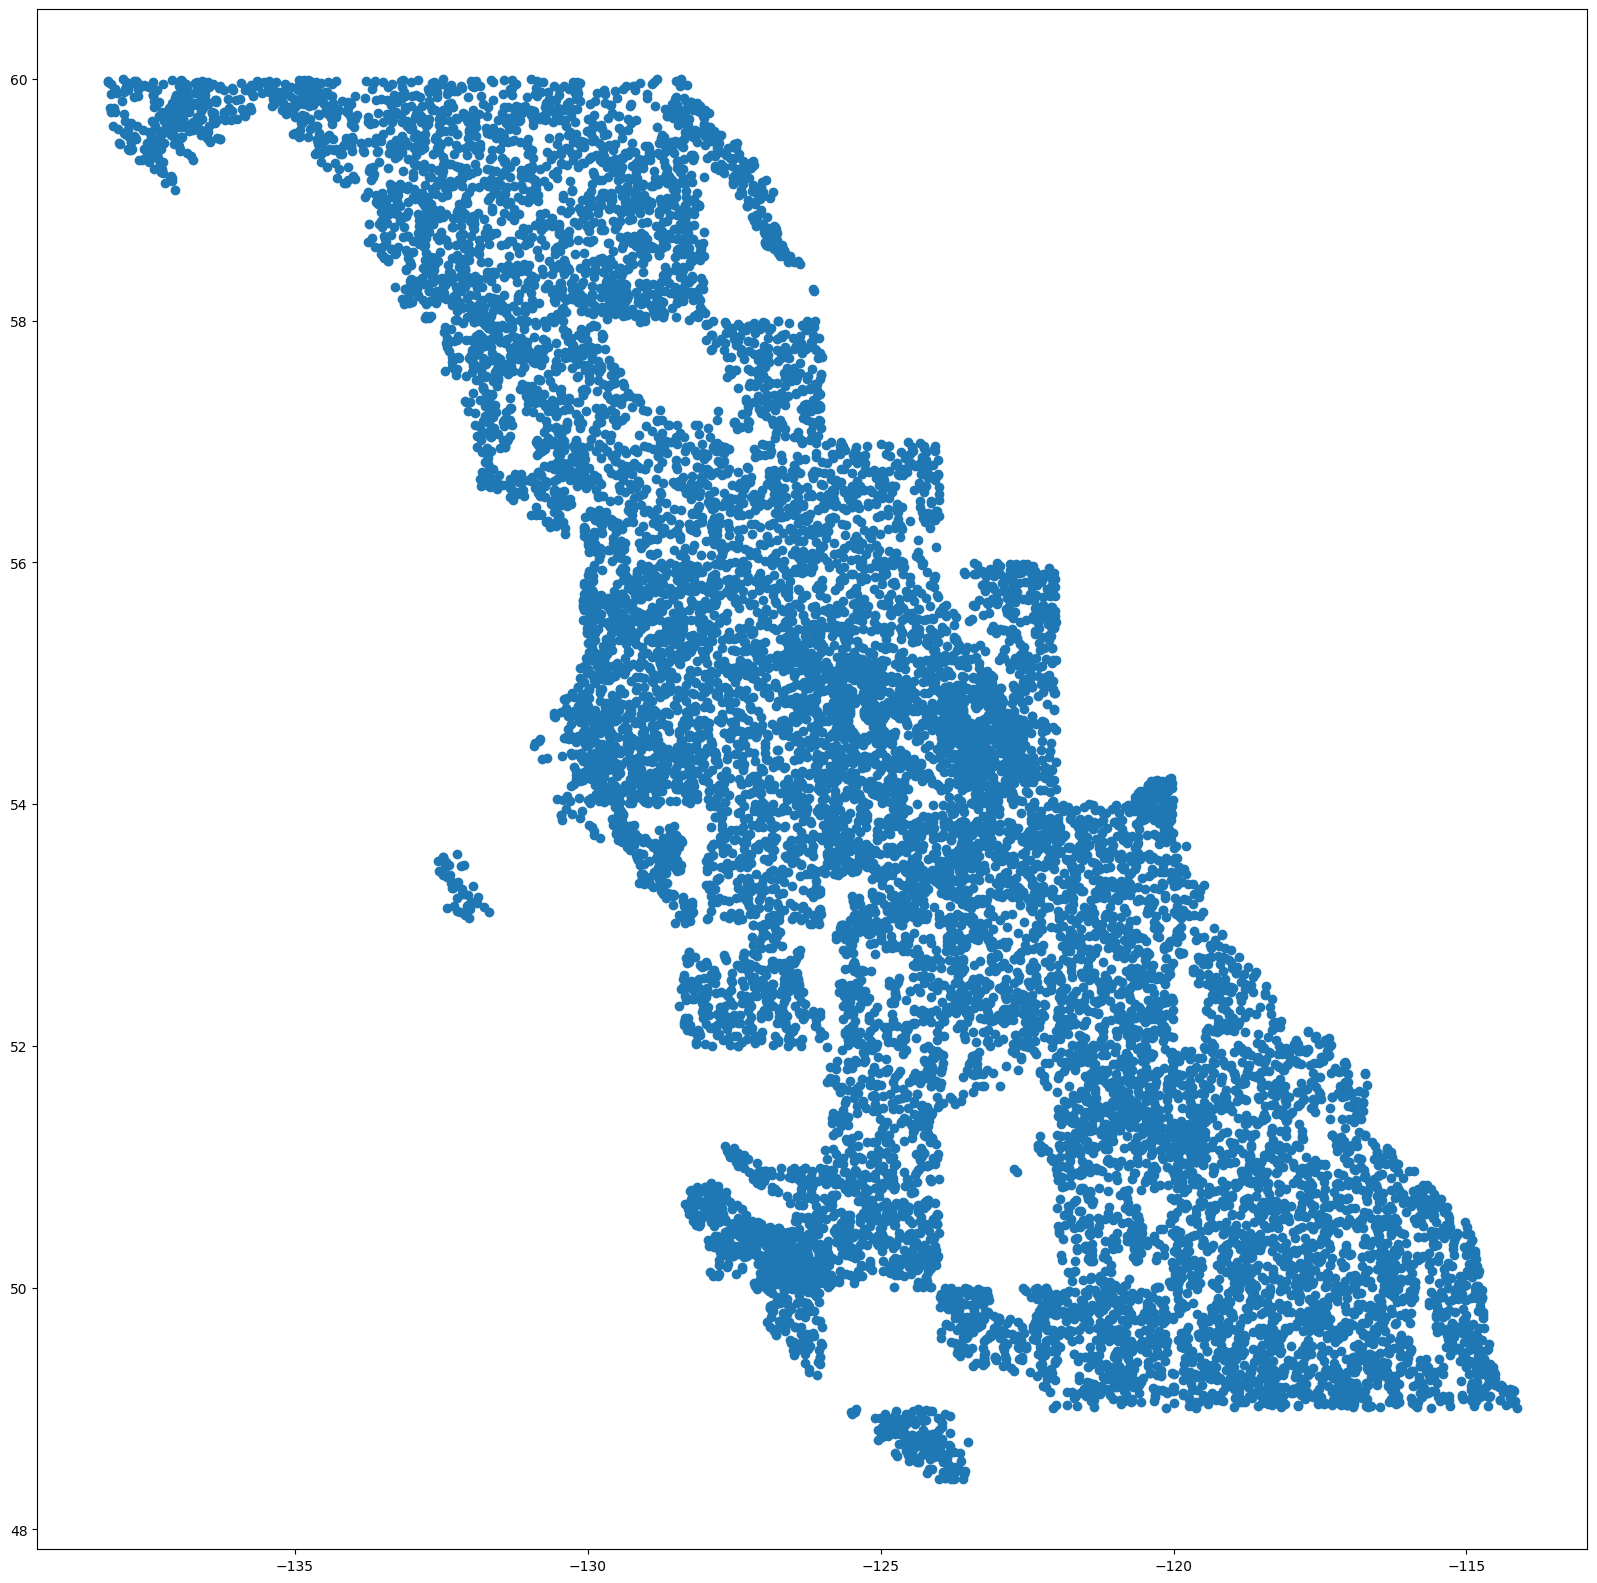

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(20,20))

ax.scatter(river_data.LONG, river_data.LAT);

### Strategy

Based on the above, it is pretty clear that we need to split the data geographically. My strategy will be to sort the data by latitude first, and then longitude, and take the first 20% to the North as my test set, and the rest as my train set. Other strategies are of course possible.

In [8]:
test_frac = int(river_data.shape[0] * .2) + 1
test_frac

3112

In [9]:
sorted_data = river_data.sort_values(by=['LAT', 'LONG'], ascending=False)
sorted_data

,MASTERID,UPDATE_REP1,UPDATE_REP2,UPDATE_REP3,NAME,TYPE2,YEAR,LAT,LONG,CATCH_AREA,...,W_INA_PPM,Yb_INA_PPM,Zn_INA_PPM,Zr_INA_PPM,WT_INA_g,pH,Uw_LIF_PPB,Fw_ISE_PPB,SO4_TRB_PPM,Cnd_uS/cm
13483,ID104O785913,RGS 52,GBC 2011-02,NaN,JENNINGS RIVER,STRM,1978,59.998270,-130.967650,NaN,...,-2.0,3.0,NaN,360.0,21.87,8.0,0.30,94.0,NaN,NaN
8267,ID114P921415,NaN,NaN,NaN,TATSHENSHINI,STRM,1992,59.998000,-137.926000,NaN,...,-1.0,1.9,NaN,NaN,13.29,8.0,0.06,-20.0,4.3,NaN
12047,ID104N777099,RGS 51,GBC 2017-04,NaN,ATLIN,STRM,1977,59.997652,-132.466388,NaN,...,-2.0,-2.0,NaN,-200.0,7.83,7.3,0.50,52.0,NaN,NaN
13006,ID104P964204,GBC 2011-02,NaN,NaN,KECHIKA,LAKE,1996,59.997590,-128.410950,NaN,...,-1.0,1.3,117.0,NaN,20.27,8.2,0.25,66.0,5.0,375.0
12964,ID104P781044,RGS 53,GBC 2011-02,NaN,MCDAME,STRM,1978,59.996950,-128.822850,NaN,...,-2.0,-2.0,NaN,-200.0,25.60,8.3,0.32,92.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10967,ID092B891104,GBC 2011-04,NaN,NaN,VICTORIA,MOSS,1989,48.423200,-123.901490,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,-0.05,-20.0,NaN,NaN
12665,ID092B891152,GBC 2011-04,NaN,NaN,VICTORIA,MOSS,1989,48.417930,-123.588760,NaN,...,NaN,NaN,NaN,NaN,NaN,6.6,-0.05,-20.0,NaN,NaN
14638,ID092B891148,GBC 2011-04,NaN,NaN,VICTORIA,MOSS,1989,48.417480,-123.801190,NaN,...,NaN,NaN,NaN,NaN,NaN,6.2,-0.05,-20.0,NaN,NaN
1501,ID092B891011,GBC 2011-04,NaN,NaN,VICTORIA,MOSS,1989,48.414470,-123.751730,NaN,...,NaN,NaN,NaN,NaN,NaN,6.6,-0.05,22.0,NaN,NaN


In [10]:
X_test = sorted_data.iloc[:test_frac]
X_train = sorted_data.iloc[test_frac:]

In [11]:
X_test.shape[0] / (X_test.shape[0] + X_train.shape[0])

0.20003856784727134

### Important: visual check of train/test split

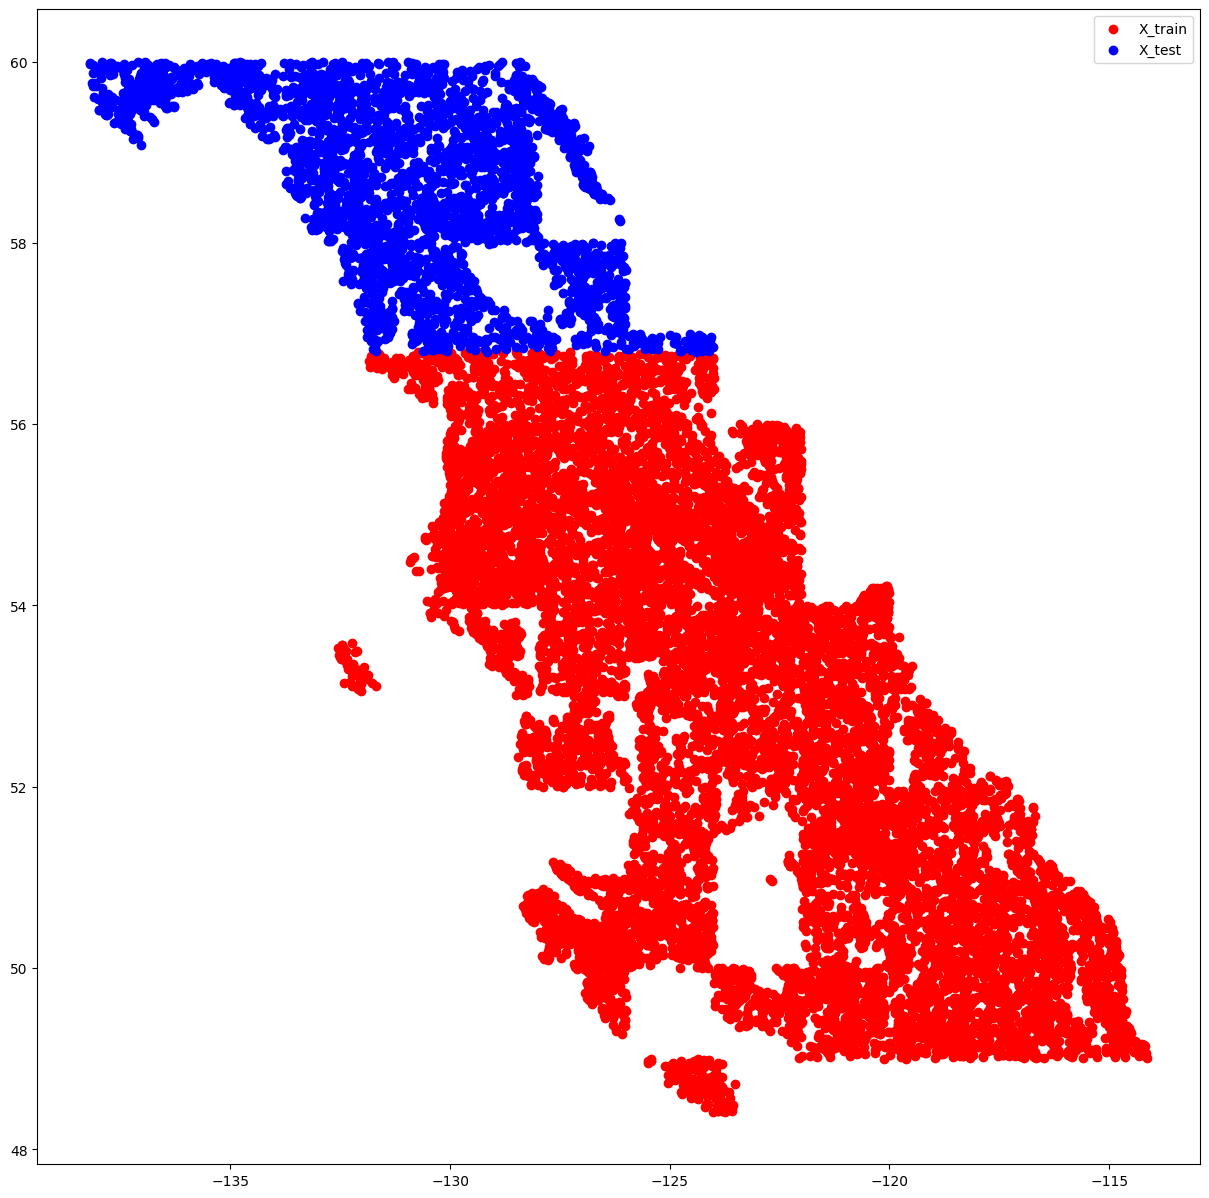

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.scatter(X_train.LONG, X_train.LAT, c='r', label='X_train')
plt.scatter(X_test.LONG, X_test.LAT, c='b', label='X_test')
plt.legend();

# Step 3: Missing values and columns to remove

We will remove the columns with >30% missing values:

In [13]:
X_train.isnull().sum()

MASTERID           0
UPDATE_REP1     4970
UPDATE_REP2     7541
UPDATE_REP3    12445
NAME               0
               ...  
pH               539
Uw_LIF_PPB      3572
Fw_ISE_PPB       889
SO4_TRB_PPM    11140
Cnd_uS/cm       9318
Length: 183, dtype: int64

In [14]:
all_cols = X_train.isnull().sum()[(X_train.isnull().sum()/X_train.shape[0])<0.3].index

In [15]:
all_cols

Index(['MASTERID', 'NAME', 'TYPE2', 'YEAR', 'LAT', 'LONG', 'STRAT', 'MAT',
       'SORC', 'ORDR', 'TYPE', 'PHYS', 'DRNP', 'WDTH', 'DPTH', 'FLOW', 'WTRC',
       'BANK', 'COMP', 'SEDC', 'Cu_AAS_PPM', 'Pb_AAS_PPM', 'Zn_AAS_PPM',
       'Au_ICP_PPB', 'Ag_ICP_PPB', 'Al_ICP_PCT', 'As_ICP_PPM', 'Ba_ICP_PPM',
       'Bi_ICP_PPM', 'Ca_ICP_PCT', 'Cd_ICP_PPM', 'Co_ICP_PPM', 'Cr_ICP_PPM',
       'Cu_ICP_PPM', 'Fe_ICP_PCT', 'Ga_ICP_PPM', 'Hg_ICP_PPB', 'K_ICP_PCT',
       'Mg_ICP_PCT', 'Mn_ICP_PPM', 'Mo_ICP_PPM', 'Na_ICP_PCT', 'Ni_ICP_PPM',
       'P_ICP_PCT', 'Pb_ICP_PPM', 'S_ICP_PCT', 'Sb_ICP_PPM', 'Sc_ICP_PPM',
       'Se_ICP_PPM', 'Sr_ICP_PPM', 'Te_ICP_PPM', 'Th_ICP_PPM', 'Ti_ICP_PCT',
       'Tl_ICP_PPM', 'U_ICP_PPM', 'V_ICP_PPM', 'W_ICP_PPM', 'Zn_ICP_PPM',
       'La_ICP_PPM', 'Au_INA_PPB', 'As_INA_PPM', 'Ba_INA_PPM', 'Br_INA_PPM',
       'Ce_INA_PPM', 'Co_INA_PPM', 'Cr_INA_PPM', 'Cs_INA_PPM', 'Fe_INA_PCT',
       'Hf_INA_PPM', 'La_INA_PPM', 'Lu_INA_PPM', 'Mo_INA_PPM', 'Na_INA_PCT',
       'R

## Range of values

Let's see what the range of our values are:

In [16]:
X_train[all_cols].describe()

,YEAR,LAT,LONG,WDTH,DPTH,Cu_AAS_PPM,Pb_AAS_PPM,Zn_AAS_PPM,Au_ICP_PPB,Ag_ICP_PPB,...,Ta_INA_PPM,Tb_INA_PPM,Th_INA_PPM,U_INA_PPM,W_INA_PPM,Yb_INA_PPM,WT_INA_g,pH,Uw_LIF_PPB,Fw_ISE_PPB
count,12445.000000,12445.000000,12445.000000,10284.000000,10240.000000,8748.000000,8748.000000,8748.000000,9670.000000,10921.000000,...,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,9791.000000,11906.000000,8873.000000,11556.000000
mean,1990.305745,52.668456,-123.496176,3.010142,39.613623,32.995885,7.798811,76.457590,11.829824,150.570277,...,0.731140,0.658674,9.533736,5.327752,-0.426533,0.828436,21.092968,7.354816,0.191505,52.347657
std,11.301178,2.235510,3.931607,3.071528,43.990886,52.713665,37.008525,148.417953,321.798603,731.577832,...,1.890515,0.932272,16.355332,12.033237,19.917698,2.975840,11.918623,0.801662,0.833033,131.798037
min,1976.000000,48.414030,-132.549023,0.000000,-1.000000,-2.000000,-2.000000,4.000000,-0.200000,-2.000000,...,-1.300000,-0.500000,-0.500000,-0.600000,-7.000000,-4.000000,0.810000,2.900000,-0.050000,-20.000000
25%,1980.000000,50.567060,-126.483110,1.000000,15.000000,15.000000,2.000000,39.000000,0.500000,38.000000,...,-0.500000,-0.500000,2.700000,1.800000,-2.000000,-2.000000,10.500000,6.900000,-0.050000,-20.000000
50%,1988.000000,52.787920,-123.901870,2.000000,25.000000,24.000000,5.000000,59.000000,1.200000,75.000000,...,0.600000,0.800000,4.600000,2.800000,-1.000000,1.700000,19.070000,7.400000,0.050000,32.000000
75%,2002.000000,54.564870,-120.565750,4.000000,50.000000,40.000000,9.000000,88.000000,2.300000,161.000000,...,1.300000,1.100000,11.000000,5.100000,-1.000000,3.000000,30.000000,7.900000,0.160000,60.000000
max,2019.000000,56.800217,-114.138649,55.000000,1000.000000,2950.000000,2450.000000,9400.000000,19432.400390,57635.000000,...,70.300000,16.000000,488.000000,502.000000,1950.000000,35.000000,68.670000,10.810000,37.400000,6560.000000


**Conclusions**: We see that we have negative values for elemental concentrations. This is not physically possible, so we will replace those. We could replace them by `nan` values, or by `zero`. We will do the latter here, assuming that if values are negative they are below detection (and thus `=0`).

# Step 4: Checking for strong co-linearity

Let's check for strong co-linearity in our numeric values and remove the strongest ones:

In [17]:
import seaborn as sns

corr_data = X_train[all_cols].select_dtypes(include=np.number).corr()
corr_data = corr_data.unstack().reset_index()
corr_data.columns = ['feature_1', 'feature_2','corr']
corr_data = corr_data[(corr_data['corr']>0.8) & (corr_data['corr'] < 1)]
corr_data

,feature_1,feature_2,corr
378,Cu_AAS_PPM,Cu_ICP_PPM,0.979452
439,Pb_AAS_PPM,Zn_AAS_PPM,0.852646
447,Pb_AAS_PPM,Cd_ICP_PPM,0.859663
461,Pb_AAS_PPM,Pb_ICP_PPM,0.987908
474,Pb_AAS_PPM,Zn_ICP_PPM,0.894714
510,Zn_AAS_PPM,Pb_AAS_PPM,0.852646
519,Zn_AAS_PPM,Cd_ICP_PPM,0.913392
533,Zn_AAS_PPM,Pb_ICP_PPM,0.832315
546,Zn_AAS_PPM,Zn_ICP_PPM,0.988100
740,Al_ICP_PCT,Ga_ICP_PPM,0.875812


In [18]:
# Creating a function to sort the features along the rows in alphabetical order

def sort_feature_names(row):
    feature_1 = row['feature_1']
    feature_2 = row['feature_2']
    
    if feature_1 > feature_2:
        row['feature_1']=feature_2
        row['feature_2']=feature_1
    return row

corr_data = corr_data.apply(lambda row: sort_feature_names(row), axis=1).drop_duplicates()

In [19]:
corr_data

,feature_1,feature_2,corr
378,Cu_AAS_PPM,Cu_ICP_PPM,0.979452
439,Pb_AAS_PPM,Zn_AAS_PPM,0.852646
447,Cd_ICP_PPM,Pb_AAS_PPM,0.859663
461,Pb_AAS_PPM,Pb_ICP_PPM,0.987908
474,Pb_AAS_PPM,Zn_ICP_PPM,0.894714
519,Cd_ICP_PPM,Zn_AAS_PPM,0.913392
533,Pb_ICP_PPM,Zn_AAS_PPM,0.832315
546,Zn_AAS_PPM,Zn_ICP_PPM,0.988100
740,Al_ICP_PCT,Ga_ICP_PPM,0.875812
837,As_ICP_PPM,As_INA_PPM,0.987533


In [20]:
all_cols = all_cols.drop(corr_data.feature_2)
all_cols

Index(['MASTERID', 'NAME', 'TYPE2', 'YEAR', 'LAT', 'LONG', 'STRAT', 'MAT',
       'SORC', 'ORDR', 'TYPE', 'PHYS', 'DRNP', 'WDTH', 'DPTH', 'FLOW', 'WTRC',
       'BANK', 'COMP', 'SEDC', 'Cu_AAS_PPM', 'Au_ICP_PPB', 'Ag_ICP_PPB',
       'Al_ICP_PCT', 'As_ICP_PPM', 'Ba_ICP_PPM', 'Bi_ICP_PPM', 'Ca_ICP_PCT',
       'Cd_ICP_PPM', 'Co_ICP_PPM', 'Cr_ICP_PPM', 'Fe_ICP_PCT', 'Hg_ICP_PPB',
       'K_ICP_PCT', 'Mg_ICP_PCT', 'Mn_ICP_PPM', 'Mo_ICP_PPM', 'Na_ICP_PCT',
       'Ni_ICP_PPM', 'P_ICP_PCT', 'S_ICP_PCT', 'Sb_ICP_PPM', 'Sc_ICP_PPM',
       'Se_ICP_PPM', 'Sr_ICP_PPM', 'Te_ICP_PPM', 'Th_ICP_PPM', 'Ti_ICP_PCT',
       'Tl_ICP_PPM', 'U_ICP_PPM', 'V_ICP_PPM', 'W_ICP_PPM', 'La_ICP_PPM',
       'Au_INA_PPB', 'Ba_INA_PPM', 'Br_INA_PPM', 'Ce_INA_PPM', 'Cr_INA_PPM',
       'Cs_INA_PPM', 'Hf_INA_PPM', 'Lu_INA_PPM', 'Na_INA_PCT', 'Rb_INA_PPM',
       'Sc_INA_PPM', 'Ta_INA_PPM', 'Yb_INA_PPM', 'WT_INA_g', 'pH',
       'Uw_LIF_PPB', 'Fw_ISE_PPB'],
      dtype='object')

# Step 5: Inspecting Categorical columns

Let's see what the categorical columns are, and how we could potentially encode them.

In [21]:
cat_values = X_train[all_cols].select_dtypes(exclude = np.number)

In [22]:
cat_values.shape

(12445, 15)

In [23]:
cat_values.columns

Index(['MASTERID', 'NAME', 'TYPE2', 'STRAT', 'MAT', 'SORC', 'ORDR', 'TYPE',
       'PHYS', 'DRNP', 'FLOW', 'WTRC', 'BANK', 'COMP', 'SEDC'],
      dtype='object')

In [33]:
for name in cat_values.columns:
    print(cat_values[name].value_counts())
    print()

MASTERID
ID104B871259    1
ID092N911072    1
ID092N913033    1
ID082N052131    1
ID092N911064    1
               ..
ID093K021444    1
ID103I009029    1
ID103I787982    1
ID093L867031    1
ID092C891294    1
Name: count, Length: 12445, dtype: int64

NAME
QUEST                  501
NASS RIVER             484
TERRACE                471
PENTICTON              391
CARIBOO                367
                      ... 
NORTH BARRIERE LAKE     11
DUNDAS ISLAND            6
NVI 2019                 2
McLeod Lake              1
BALDY BATHOLITH          1
Name: count, Length: 71, dtype: int64

TYPE2
STRM    9403
LAKE    2124
MOSS     918
Name: count, dtype: int64

STRAT
TrJTk     579
LTQCh     412
lmJHz     367
uTrJNc    352
muTrVa    287
         ... 
JF          1
PTrS        1
lmJMb       1
LKTgd       1
PrDdr       1
Name: count, Length: 490, dtype: int64

MAT
Stream Sediment and Water    8935
Lake Sediment and Water      1857
Moss Sediment and Water       882
Stream Sediment               37

In [27]:
cat_values.NAME.value_counts()

NAME
QUEST                  501
NASS RIVER             484
TERRACE                471
PENTICTON              391
CARIBOO                367
                      ... 
NORTH BARRIERE LAKE     11
DUNDAS ISLAND            6
NVI 2019                 2
McLeod Lake              1
BALDY BATHOLITH          1
Name: count, Length: 71, dtype: int64

In [29]:
cat_values.WTRC.value_counts()

WTRC
Colourless      7798
Brown/Clear     1061
Clear            623
White/Cloudy     530
Brown/Cloudy      96
Other              4
Brown              1
Name: count, dtype: int64

In [28]:
cat_values.FLOW.value_counts()

FLOW
Moderate    3819
Fast        3578
Slow        1693
Torrent      650
Stagnant     370
Name: count, dtype: int64

In [25]:
cat_values.isnull().sum()

MASTERID       0
NAME           0
TYPE2          0
STRAT       2551
MAT          342
SORC        3126
ORDR        3063
TYPE        3127
PHYS        3127
DRNP        3127
FLOW        2335
WTRC        2332
BANK        2172
COMP        2495
SEDC         934
dtype: int64

### Initial conclusions

* Many features can be `OneHotEncoded` but we cannot guarantee all values will be available in the training set and some have very high cardinality: 'MASTERID',  'NAME', 'STRAT', 'SORC', 'PHYS, 'DRNP', 'CONT', 'BANK', 'BNKP','COMP','SEDC','SEDP'. This is also a job that a `FeatureHasher` would be perfect for (see `Further Learning` exercise for today if you are interested in this.

* One feature is clearly ordinal:'FLOW', and a second one is potentially ordinal too ('WTRC')

* Some features can be one-hot-encoded though feature hashing is also possible: 'MAT', 'ORDR', 'TYPE' and 'TYPE2'

* Missing values are represented by the string 'Undefined'

In [34]:
to_hash = ['MASTERID', 'NAME', 'STRAT', 'SORC', 'PHYS', 'DRNP', 'CONT', 'BANK', 'BNKP','COMP','SEDC','SEDP', 'MAT', 'ORDR', 'TYPE','TYPE2']
to_ordinal = ['FLOW', 'WTRC']

## Step 6: Inspecting numerical features

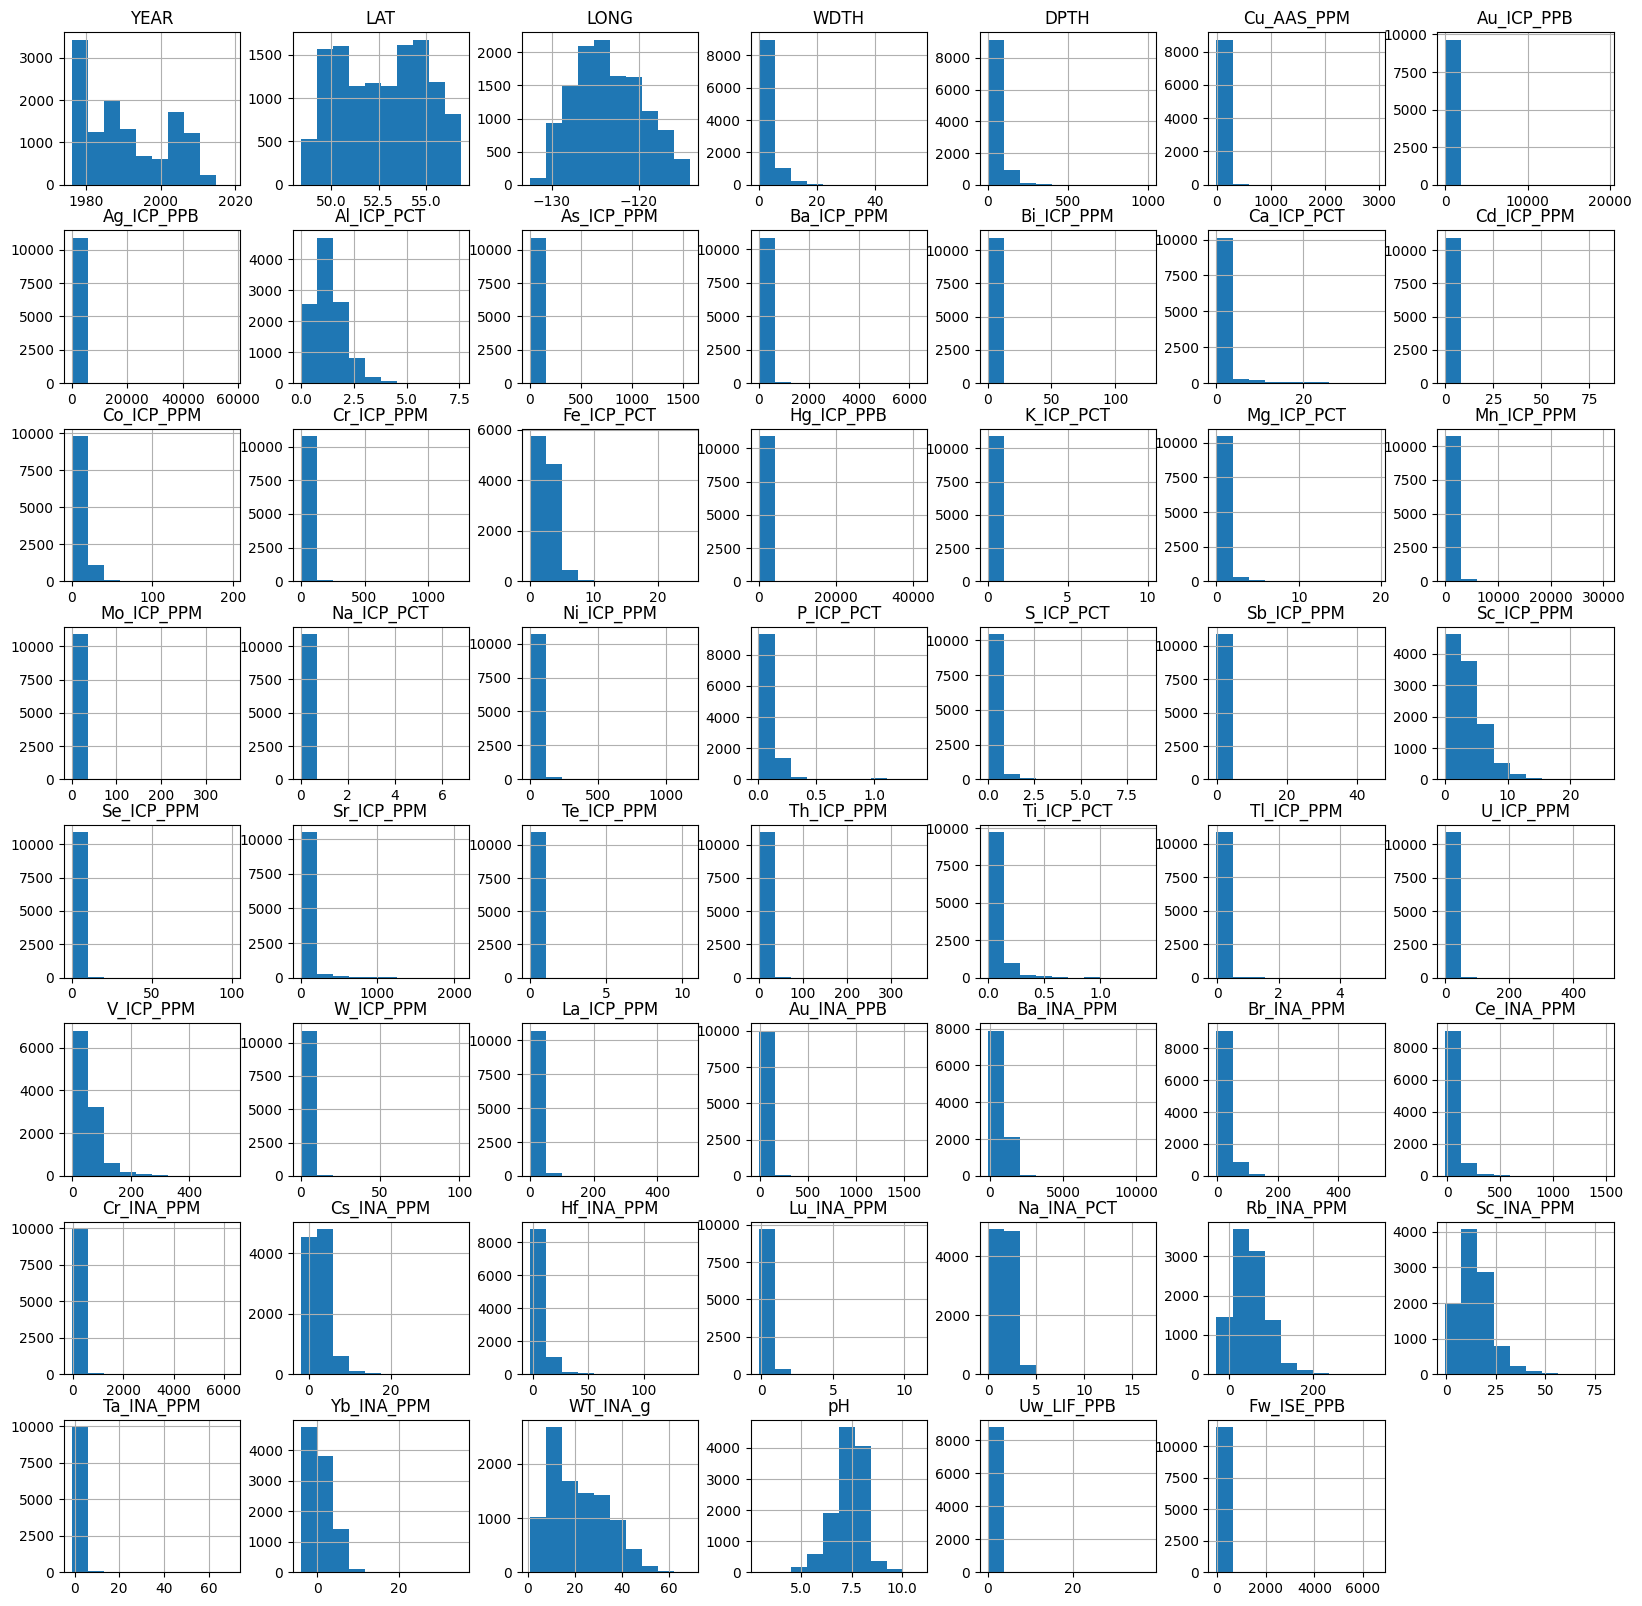

In [36]:
num_data = X_train[all_cols].select_dtypes(include = np.number)
num_data.hist(figsize=(20,20));

/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


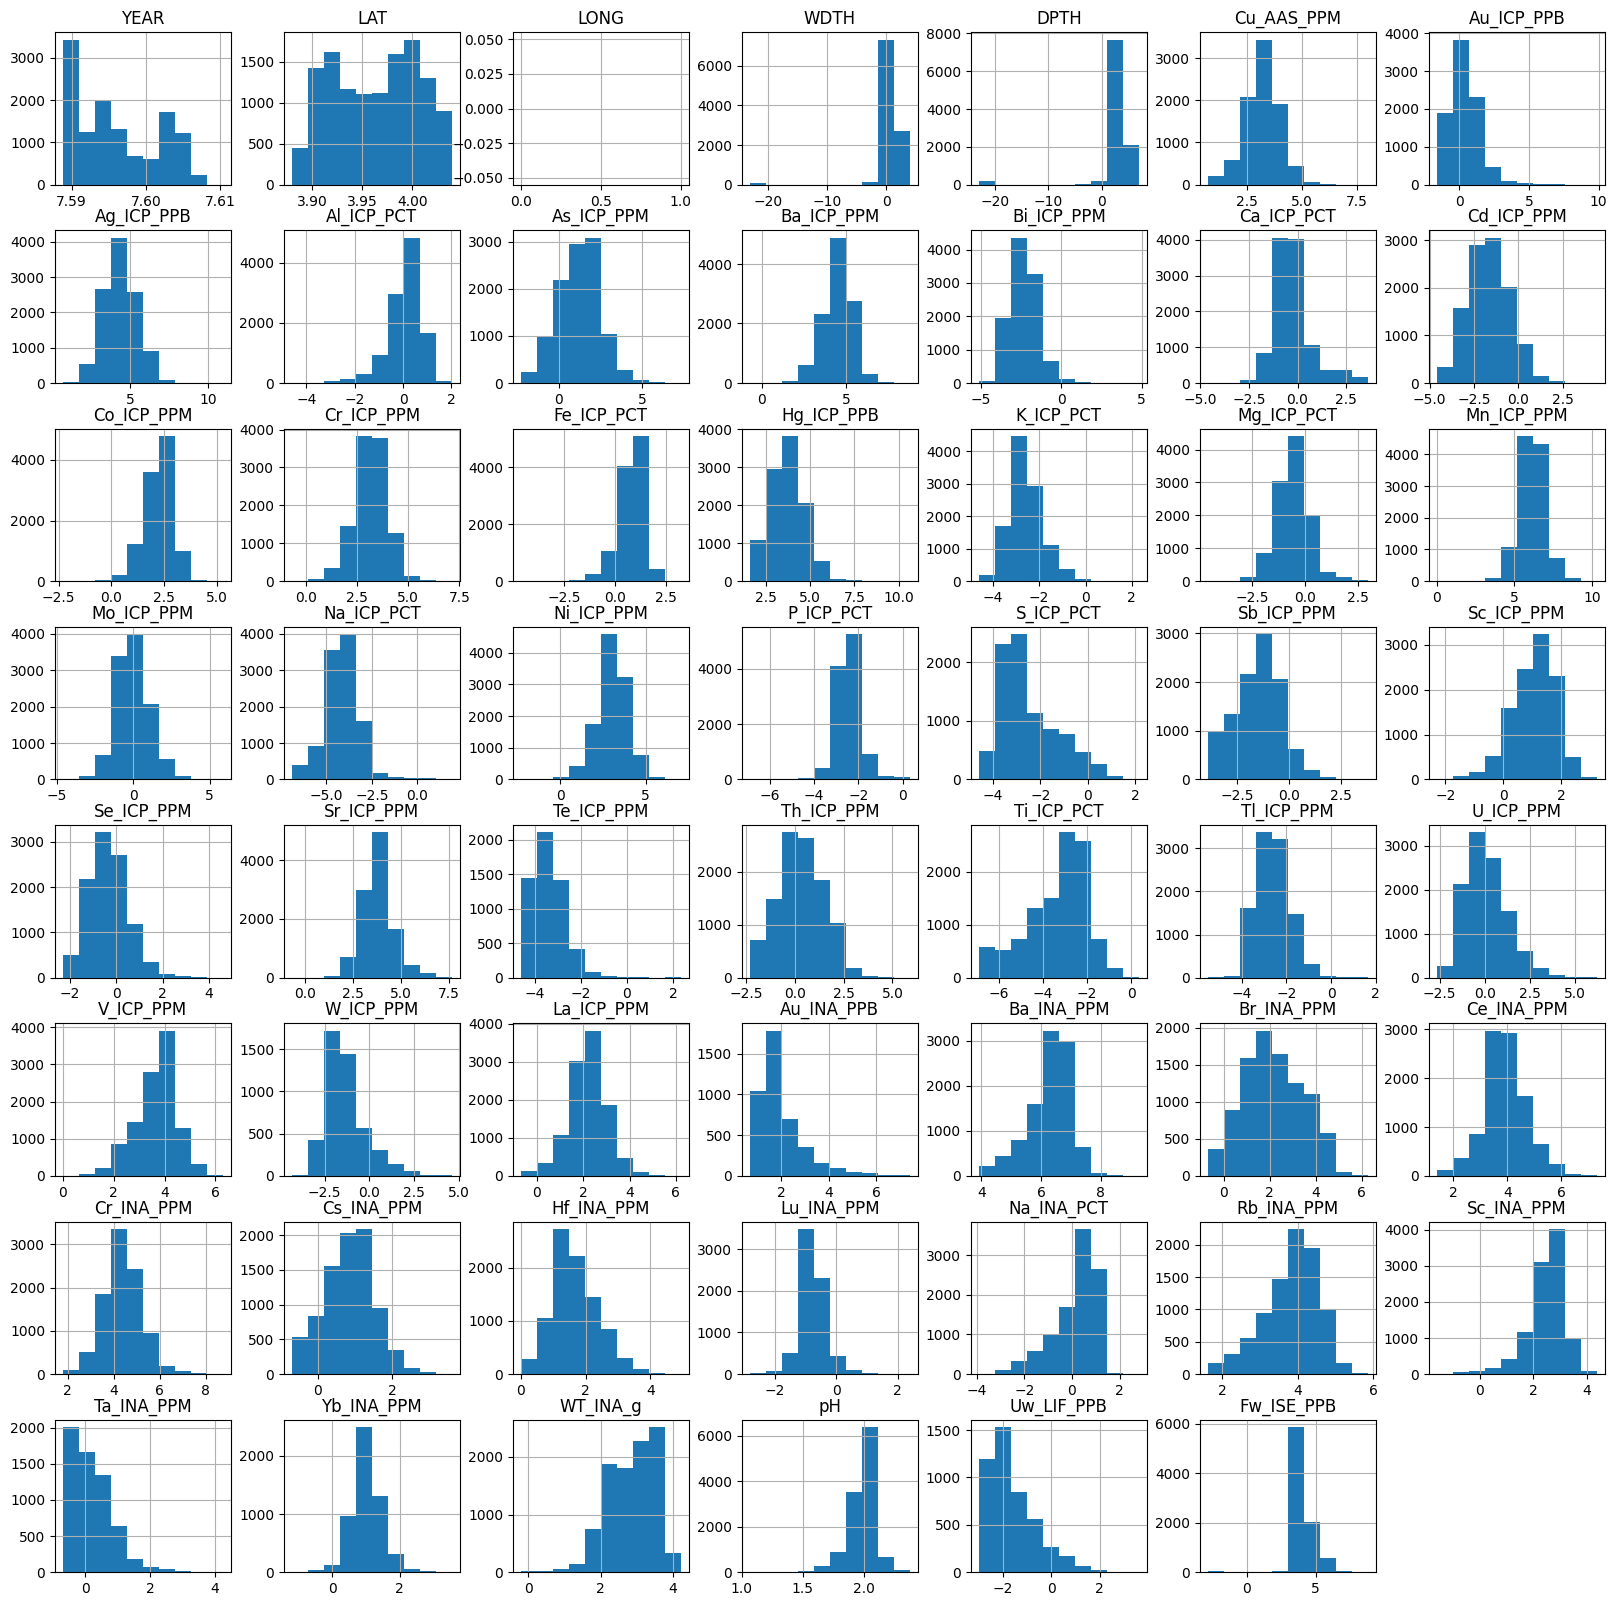

In [35]:
np.log(num_data+1e-10).hist(figsize=(20,20));

## Conclusions:

1. Except for 'YEAR', 'LAT', 'LONG', all other features benefit from turning them into logarithmic scale

In [37]:
no_log = ['YEAR', 'LAT', 'LONG']
to_log = num_data.columns.drop(['YEAR', 'LAT', 'LONG'])

In [38]:
to_log

Index(['WDTH', 'DPTH', 'Cu_AAS_PPM', 'Au_ICP_PPB', 'Ag_ICP_PPB', 'Al_ICP_PCT',
       'As_ICP_PPM', 'Ba_ICP_PPM', 'Bi_ICP_PPM', 'Ca_ICP_PCT', 'Cd_ICP_PPM',
       'Co_ICP_PPM', 'Cr_ICP_PPM', 'Fe_ICP_PCT', 'Hg_ICP_PPB', 'K_ICP_PCT',
       'Mg_ICP_PCT', 'Mn_ICP_PPM', 'Mo_ICP_PPM', 'Na_ICP_PCT', 'Ni_ICP_PPM',
       'P_ICP_PCT', 'S_ICP_PCT', 'Sb_ICP_PPM', 'Sc_ICP_PPM', 'Se_ICP_PPM',
       'Sr_ICP_PPM', 'Te_ICP_PPM', 'Th_ICP_PPM', 'Ti_ICP_PCT', 'Tl_ICP_PPM',
       'U_ICP_PPM', 'V_ICP_PPM', 'W_ICP_PPM', 'La_ICP_PPM', 'Au_INA_PPB',
       'Ba_INA_PPM', 'Br_INA_PPM', 'Ce_INA_PPM', 'Cr_INA_PPM', 'Cs_INA_PPM',
       'Hf_INA_PPM', 'Lu_INA_PPM', 'Na_INA_PCT', 'Rb_INA_PPM', 'Sc_INA_PPM',
       'Ta_INA_PPM', 'Yb_INA_PPM', 'WT_INA_g', 'pH', 'Uw_LIF_PPB',
       'Fw_ISE_PPB'],
      dtype='object')

## Step 7: Building initial pipelines

We will need the following pipelines:
1. A pipeline for straight numerical data
2. A pipeline for straight numerical data with negative values being replaced by zero, and then log-transform
3. A pipeline for categorical data that need ordinal encoding
4. A pipeline for categorical data that need feature hashing
5. A pipeline for categorical data that need one-hot-encoding (N.B. A simpler version of this would be to merge 4 and 5 into a `OneHotEncoder`. This will work as long as the encoder is fitted with the `handle_unknow=ignore` option).

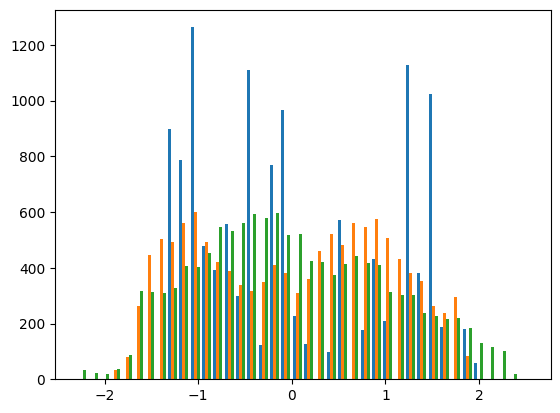

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

num_pipe = make_pipeline(SimpleImputer(), StandardScaler())
plt.hist(num_pipe.fit_transform(X_train[no_log]),bins=40);

## Observation

Width and Depth have serious outliers not corrected by taking the log.

In [40]:
from sklearn.base import TransformerMixin, BaseEstimator

class LogTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, seed = 1e-5):
        self.seed=seed
        return None
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.log(X+self.seed)


class ZeroTransform(TransformerMixin, BaseEstimator):
    """This transformer replaces negative values by zeros: elemental concentrations cannot be < zero."""
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = np.where(X < 0, 0, X)
        return X

In [41]:
num_log_pipe = make_pipeline(SimpleImputer(), ZeroTransform(), LogTransformer(seed=6e-3), RobustScaler())
test_num = num_log_pipe.fit_transform(X_train[to_log])

In [42]:
num_log_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('zerotransform', ZeroTransform()),
                ('logtransformer', LogTransformer(seed=0.006)),
                ('robustscaler', RobustScaler())])

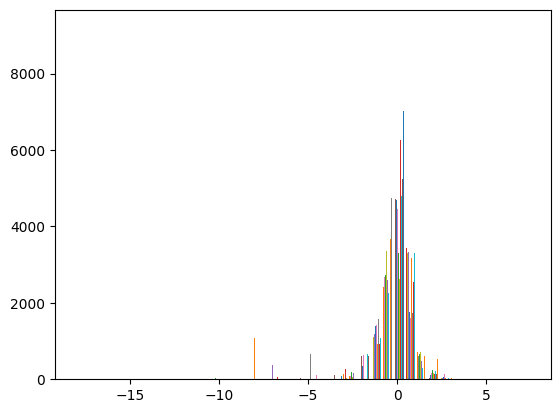

In [41]:
plt.hist(test_num, bins=40);

### Taking care of the ordinal encoding

In [43]:
from sklearn.base import TransformerMixin, BaseEstimator

class OrdinalTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, categories):
        self.categories = categories
        return None

    def fit(self, X=None, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        if type(X)==pd.DataFrame:
            X = X.values
        for value, categorie in zip(range(len(self.categories)), self.categories):
            idxs = np.where(X==categorie)[0]
            X[idxs] = value
                    
        return X

In [43]:
OrdinalTransformer(categories=['Stagnant', 'Slow', 'Moderate', 'Fast', 'Torrent']).fit_transform(X_train[['FLOW']])

array([[3],
       [3],
       [2],
       ...,
       [3],
       [2],
       [3]], dtype=object)

In [44]:
X_train[['FLOW']]

,FLOW
634,Fast
14370,Fast
12770,Moderate
10077,Fast
2788,Fast
...,...
10967,Slow
12665,Slow
14638,Fast
1501,Moderate


In [44]:
ord_encode_pipe = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                       SimpleImputer(missing_values='Undefined', strategy='most_frequent'), 
                       OrdinalTransformer(categories=['Stagnant','Slow', 'Moderate', 'Fast','Torrent','Clear', 'Colourless', 'White/Cloudy','Brown/Clear','Brown/Cloudy','Brown']),
                       StandardScaler())
ord_encode_pipe

Pipeline(steps=[('simpleimputer-1', SimpleImputer(strategy='most_frequent')),
                ('simpleimputer-2',
                 SimpleImputer(missing_values='Undefined',
                               strategy='most_frequent')),
                ('ordinaltransformer',
                 OrdinalTransformer(categories=['Stagnant', 'Slow', 'Moderate',
                                                'Fast', 'Torrent', 'Clear',
                                                'Colourless', 'White/Cloudy',
                                                'Brown/Clear', 'Brown/Cloudy',
                                                'Brown'])),
                ('standardscaler', StandardScaler())])

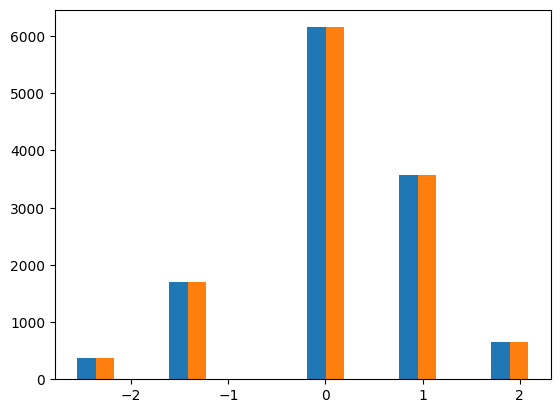

In [39]:
plt.hist(ord_encode_pipe.fit_transform(X_train[to_ordinal]));

## Creating the hashing ColumnTransformer

This section is advanced, and I expect most of you will have used a `OneHotEncoder`. This works fine as long as you use `handle_unknown = 'ignore'`. This is because many of the values we will find are specific to the geographic place where the sample was taken. A `FeatureHasher` as illustrated in exercise 4 is a superior way to handle this type of data.

In [45]:
to_hash

['MASTERID',
 'NAME',
 'STRAT',
 'SORC',
 'PHYS',
 'DRNP',
 'CONT',
 'BANK',
 'BNKP',
 'COMP',
 'SEDC',
 'SEDP',
 'MAT',
 'ORDR',
 'TYPE',
 'TYPE2']

In [46]:
from sklearn.compose import ColumnTransformer

hashers = []

for feature in to_hash:
    hashers.append((f'hashed_{feature}',make_pipeline(SimpleImputer(strategy='most_frequent'), FeatureHasher(input_type='string',n_features=1024)), [feature]))

hashers_pipe = ColumnTransformer(hashers)

In [42]:
hashers_pipe

ColumnTransformer(transformers=[('hashed_MASTERID',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('featurehasher',
                                                  FeatureHasher(input_type='string',
                                                                n_features=1024))]),
                                 ['MASTERID']),
                                ('hashed_NAME',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('featurehasher',
                                                  FeatureHasher(input_type='string',...
                                 ['ORDR']),
                                ('hashed_TYPE',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('featurehasher',
                                                  FeatureHasher(input_type='string',
                                                                n_features=1024))]),
                                 ['TYPE']),
                                ('hashed_TYPE2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('featurehasher',
                                                  FeatureHasher(input_type='string',
                                                                n_features=1024))]),
                                 ['TYPE2'])])

In [47]:
hashers_pipe.fit_transform(X_train)

<12445x16384 sparse matrix of type '<class 'numpy.float64'>'
	with 199120 stored elements in Compressed Sparse Row format>

## Assembling the final pipeline

In [48]:
from sklearn.compose import ColumnTransformer

non_hash = ColumnTransformer([('no_log_num',num_pipe,no_log),
                            ('log_num', num_log_pipe, to_log),
                            ('ordinal_features',ord_encode_pipe,to_ordinal)])
non_hash

ColumnTransformer(transformers=[('no_log_num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['YEAR', 'LAT', 'LONG']),
                                ('log_num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('zerotransform',
                                                  ZeroTransform()),
                                                 ('logtransformer',
                                                  LogTransformer(seed=0.006)),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 Index(['WDTH', 'DPT...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(missing_values='Undefined',
                                                                strategy='most_frequent')),
                                                 ('ordinaltransformer',
                                                  OrdinalTransformer(categories=['Stagnant',
                                                                                 'Slow',
                                                                                 'Moderate',
                                                                                 'Fast',
                                                                                 'Torrent',
                                                                                 'Clear',
                                                                                 'Colourless',
                                                                                 'White/Cloudy',
                                                                                 'Brown/Clear',
                                                                                 'Brown/Cloudy',
                                                                                 'Brown'])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['FLOW', 'WTRC'])])

In [49]:
non_hash.fit_transform(X_train)

array([[-0.29252509,  1.8483152 , -1.68791221, ..., -0.40080855,
         0.95175455,  0.95175455],
       [ 1.21180333,  1.84820125, -1.46803851, ...,  0.37011319,
         0.95175455,  0.95175455],
       [ 1.21180333,  1.84819281, -1.49012873, ...,  0.37011319,
        -0.23270399, -0.23270399],
       ...,
       [-0.11554528, -1.90164526, -0.07758321, ..., -8.6015375 ,
         0.95175455,  0.95175455],
       [-0.11554528, -1.90299176, -0.06500261, ..., -0.48681586,
        -0.23270399, -0.23270399],
       [-0.11554528, -1.90318859, -0.13105713, ..., -0.48681586,
         0.95175455,  0.95175455]])

In [50]:
from sklearn.pipeline import FeatureUnion

final_pipe = FeatureUnion([('hashing',hashers_pipe), ('not_hashing',non_hash)])

In [51]:
final_pipe

FeatureUnion(transformer_list=[('hashing',
                                ColumnTransformer(transformers=[('hashed_MASTERID',
                                                                 Pipeline(steps=[('simpleimputer',
                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                 ('featurehasher',
                                                                                  FeatureHasher(input_type='string',
                                                                                                n_features=1024))]),
                                                                 ['MASTERID']),
                                                                ('hashed_NAME',
                                                                 Pipeline(steps=[('simpleimputer',
                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                 ('feature...
                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                 ('simpleimputer-2',
                                                                                  SimpleImputer(missing_values='Undefined',
                                                                                                strategy='most_frequent')),
                                                                                 ('ordinaltransformer',
                                                                                  OrdinalTransformer(categories=['Stagnant',
                                                                                                                 'Slow',
                                                                                                                 'Moderate',
                                                                                                                 'Fast',
                                                                                                                 'Torrent',
                                                                                                                 'Clear',
                                                                                                                 'Colourless',
                                                                                                                 'White/Cloudy',
                                                                                                                 'Brown/Clear',
                                                                                                                 'Brown/Cloudy',
                                                                                                                 'Brown'])),
                                                                                 ('standardscaler',
                                                                                  StandardScaler())]),
                                                                 ['FLOW',
                                                                  'WTRC'])]))])

In [48]:
final_pipe.fit(X_train)

FeatureUnion(transformer_list=[('hashing',
                                ColumnTransformer(transformers=[('hashed_MASTERID',
                                                                 Pipeline(steps=[('simpleimputer',
                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                 ('featurehasher',
                                                                                  FeatureHasher(input_type='string',
                                                                                                n_features=1024))]),
                                                                 ['MASTERID']),
                                                                ('hashed_NAME',
                                                                 Pipeline(steps=[('simpleimputer',
                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                 ('feature...
                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                 ('simpleimputer-2',
                                                                                  SimpleImputer(missing_values='Undefined',
                                                                                                strategy='most_frequent')),
                                                                                 ('ordinaltransformer',
                                                                                  OrdinalTransformer(categories=['Stagnant',
                                                                                                                 'Slow',
                                                                                                                 'Moderate',
                                                                                                                 'Fast',
                                                                                                                 'Torrent',
                                                                                                                 'Clear',
                                                                                                                 'Colourless',
                                                                                                                 'White/Cloudy',
                                                                                                                 'Brown/Clear',
                                                                                                                 'Brown/Cloudy',
                                                                                                                 'Brown'])),
                                                                                 ('standardscaler',
                                                                                  StandardScaler())]),
                                                                 ['FLOW',
                                                                  'WTRC'])]))])

In [49]:
X_train = final_pipe.transform(X_train)

In [52]:
# X_train = final_pipe.fit_transform(X_train)

In [53]:
X_test = final_pipe.transform(X_test)

In [51]:
X_train.toarray()

array([[ 0.        ,  0.        ,  0.        , ..., -0.40080855,
         0.95175455,  0.95175455],
       [ 0.        ,  0.        ,  0.        , ...,  0.37011319,
         0.95175455,  0.95175455],
       [ 0.        ,  0.        ,  0.        , ...,  0.37011319,
        -0.23270399, -0.23270399],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -8.6015375 ,
         0.95175455,  0.95175455],
       [ 0.        ,  0.        ,  0.        , ..., -0.48681586,
        -0.23270399, -0.23270399],
       [ 0.        ,  0.        ,  0.        , ..., -0.48681586,
         0.95175455,  0.95175455]])

=====

### ☑️ Test your code

In [52]:
from nbresult import ChallengeResult
from river_geochemistry import GeochemPrep

prep = GeochemPrep()
prep.fit(river_data)


result = ChallengeResult('geochem_prep',
                         sparsity = type(X_train),
                         pipeline = prep
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.2, pytest-7.4.2, pluggy-1.3.0 -- /Users/cedric/.pyenv/versions/3.10/envs/dsml4pe/bin/python3
cachedir: .pytest_cache
rootdir: /Users/cedric/code/cedricmjohn/teaching/Machine-Learning-for-Planet-Earth-Practicals/05-ML-Workflow/03-Prepare-River-Data-Pipeline/tests
plugins: anyio-4.0.0
collecting ... collected 3 items

test_geochem_prep.py::TestGeochem_prep::test_can_transform_testset PASSED [ 33%]
test_geochem_prep.py::TestGeochem_prep::test_can_transform_trainset PASSED [ 66%]
test_geochem_prep.py::TestGeochem_prep::test_is_sparse PASSED            [100%]

============================== 3 passed in 1.02s ===============================


💯 You can commit your code:

git add tests/geochem_prep.pickle

git commit -m 'Completed geochem_prep step'

git push origin master



=============================================================================================================================================================================================================================================

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.